<a href="https://colab.research.google.com/github/samuelsushanth/machinelearninganddataanalysisprojects/blob/main/Lending_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Lending Case Study

In [ ]:
# Importing the required libraries

import pandas as pd
import numpy as np
import warnings

import re
import matplotlib.pyplot as plt
import seaborn as sns
warnings.simplefilter("ignore")
import plotly.express as px


In [ ]:
# Read the file
df = pd.read_csv("loan.csv")

In [ ]:
# checking columns and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [ ]:
# Finding the percentage of null values in columns
(100*df.isnull().mean()).sort_values(ascending=False).head(50)

verification_status_joint         100.0
annual_inc_joint                  100.0
mo_sin_old_rev_tl_op              100.0
mo_sin_old_il_acct                100.0
bc_util                           100.0
bc_open_to_buy                    100.0
avg_cur_bal                       100.0
acc_open_past_24mths              100.0
inq_last_12m                      100.0
total_cu_tl                       100.0
inq_fi                            100.0
total_rev_hi_lim                  100.0
all_util                          100.0
max_bal_bc                        100.0
open_rv_24m                       100.0
open_rv_12m                       100.0
il_util                           100.0
total_bal_il                      100.0
mths_since_rcnt_il                100.0
open_il_24m                       100.0
open_il_12m                       100.0
open_il_6m                        100.0
open_acc_6m                       100.0
tot_cur_bal                       100.0
tot_coll_amt                      100.0


In [ ]:
# Removing the columns which have complete blank values
df.dropna(how='all', axis=1, inplace=True)

In [ ]:
(100*df.isnull().mean()).sort_values(ascending=False).head(50)

next_pymnt_d                  97.129693
mths_since_last_record        92.985372
mths_since_last_delinq        64.662487
desc                          32.585543
emp_title                      6.191303
emp_length                     2.706650
pub_rec_bankruptcies           1.754916
last_pymnt_d                   0.178765
chargeoff_within_12_mths       0.140998
collections_12_mths_ex_med     0.140998
revol_util                     0.125891
tax_liens                      0.098195
title                          0.027696
last_credit_pull_d             0.005036
home_ownership                 0.000000
int_rate                       0.000000
out_prncp_inv                  0.000000
total_pymnt                    0.000000
total_pymnt_inv                0.000000
total_rec_prncp                0.000000
total_rec_int                  0.000000
total_rec_late_fee             0.000000
recoveries                     0.000000
collection_recovery_fee        0.000000
term                           0.000000


In [ ]:
# We can remove columns having single value only, as it will not add any value to our data.
df.nunique().sort_values()

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
policy_code                       1
collections_12_mths_ex_med        1
pymnt_plan                        1
initial_list_status               1
term                              2
next_pymnt_d                      2
pub_rec_bankruptcies              3
loan_status                       3
verification_status               3
pub_rec                           5
home_ownership                    5
grade                             7
inq_last_6mths                    9
emp_length                       11
delinq_2yrs                      11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
mths_since_last_delinq           95
last_pymnt_d                

In [ ]:
# Removing columns having sinle value only.
df = df.loc[:,df.nunique()>1]

In [ ]:
(100*df.isnull().mean()).sort_values(ascending=False).head(50)

next_pymnt_d               97.129693
mths_since_last_record     92.985372
mths_since_last_delinq     64.662487
desc                       32.585543
emp_title                   6.191303
emp_length                  2.706650
pub_rec_bankruptcies        1.754916
last_pymnt_d                0.178765
revol_util                  0.125891
title                       0.027696
last_credit_pull_d          0.005036
recoveries                  0.000000
total_acc                   0.000000
open_acc                    0.000000
pub_rec                     0.000000
revol_bal                   0.000000
last_pymnt_amnt             0.000000
out_prncp                   0.000000
total_rec_late_fee          0.000000
out_prncp_inv               0.000000
total_pymnt                 0.000000
inq_last_6mths              0.000000
total_rec_prncp             0.000000
collection_recovery_fee     0.000000
total_rec_int               0.000000
total_pymnt_inv             0.000000
id                          0.000000
e

In [ ]:
# As our aim to find whether the person will default the loan or not. columns which denote the value after the loan processing are not required. Thus removing all columns

df.drop(['delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util','total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','funded_amnt_inv','next_pymnt_d','mths_since_last_record','mths_since_last_delinq','pub_rec_bankruptcies'],axis=1,inplace=True)

df.drop(["title","emp_title","desc","url","zip_code","member_id"],axis=1,inplace=True)


In [ ]:
(df.isnull().sum()).sort_values(ascending=False).head(50)

emp_length             1075
home_ownership            0
addr_state                0
purpose                   0
loan_status               0
issue_d                   0
verification_status       0
annual_inc                0
id                        0
loan_amnt                 0
sub_grade                 0
grade                     0
installment               0
int_rate                  0
term                      0
funded_amnt               0
dti                       0
dtype: int64

In [ ]:
# As emp_length is important and we can not fill the value, we need to remove the data which does not have value.

df = df.loc[df["emp_length"].notnull()]

In [ ]:
(df.isnull().sum()).sort_values(ascending=False).head(50)

id                     0
home_ownership         0
addr_state             0
purpose                0
loan_status            0
issue_d                0
verification_status    0
annual_inc             0
emp_length             0
loan_amnt              0
sub_grade              0
grade                  0
installment            0
int_rate               0
term                   0
funded_amnt            0
dti                    0
dtype: int64

In [ ]:
# Checking the Data types of column
df.dtypes

id                       int64
loan_amnt                int64
funded_amnt              int64
term                    object
int_rate                object
installment            float64
grade                   object
sub_grade               object
emp_length              object
home_ownership          object
annual_inc             float64
verification_status     object
issue_d                 object
loan_status             object
purpose                 object
addr_state              object
dti                    float64
dtype: object

In [ ]:
df.head()

,id,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti
0,1077501,5000,5000,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65
1,1077430,2500,2500,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00
2,1077175,2400,2400,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72
3,1076863,10000,10000,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00
4,1075358,3000,3000,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,OR,17.94


In [ ]:
# We saw that several columns are in object format, we need to clean those column values to numeric for analysis
def clean_numbers(x):
    matches = re.compile(r'([\d.]+)').findall(str(x))
    if len(matches)>0:
        return np.float32(matches[0])
    else:
        return 0

In [ ]:
df[['term','int_rate','emp_length']] = df[['term','int_rate','emp_length']].apply(lambda x: x.apply(clean_numbers),axis=1 )

In [ ]:
df.dtypes

id                       int64
loan_amnt                int64
funded_amnt              int64
term                   float32
int_rate               float32
installment            float64
grade                   object
sub_grade               object
emp_length             float32
home_ownership          object
annual_inc             float64
verification_status     object
issue_d                 object
loan_status             object
purpose                 object
addr_state              object
dti                    float64
dtype: object

In [ ]:
# Derived Columns
# Creating New columns for year and month for issue_date
df["issue_year"] = pd.to_datetime(df["issue_d"],format="%b-%y").dt.year.astype('int')
df["issue_month"] = pd.to_datetime(df["issue_d"],format="%b-%y").dt.month

In [ ]:
cat_cols = ["installment","grade","sub_grade","emp_length","home_ownership","verification_status","loan_status","purpose","issue_month","issue_year"]
num_cols = ["loan_amnt","funded_amnt","term","annual_inc"]

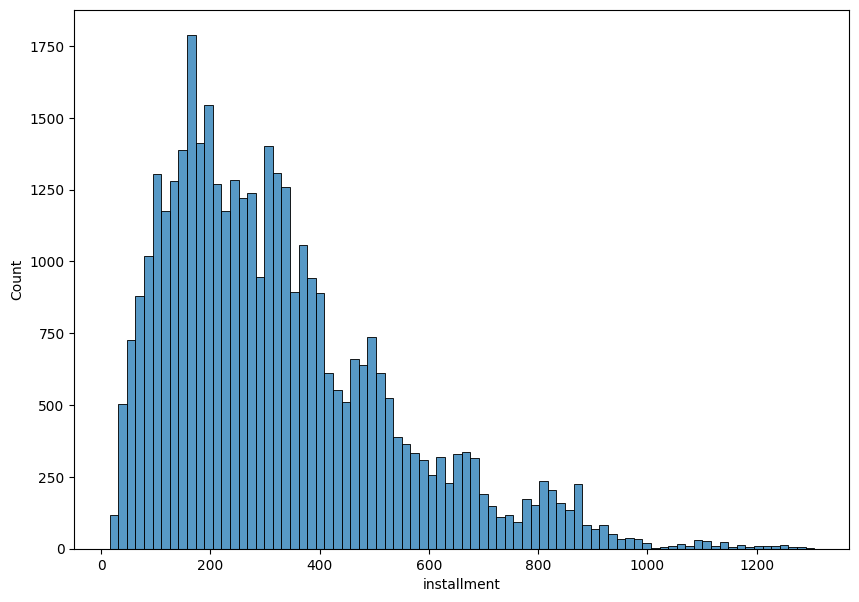

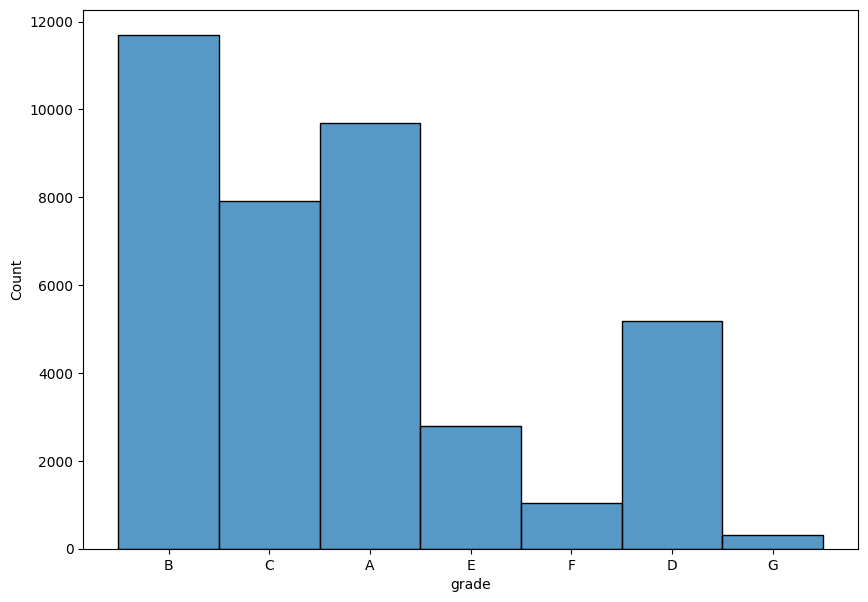

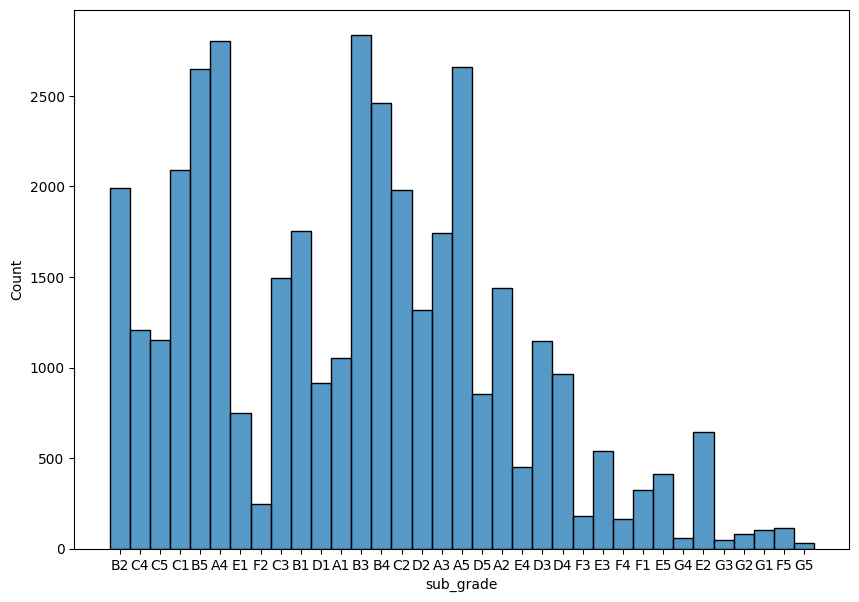

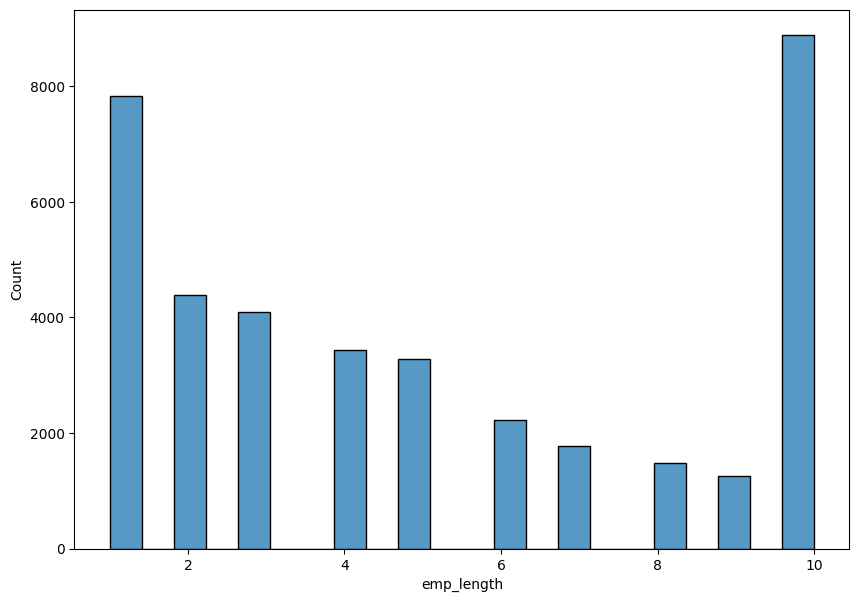

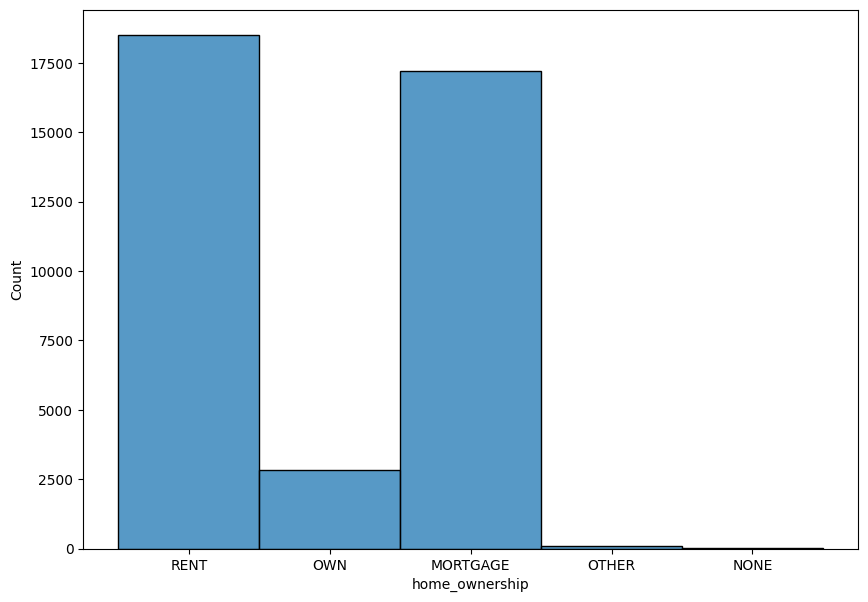

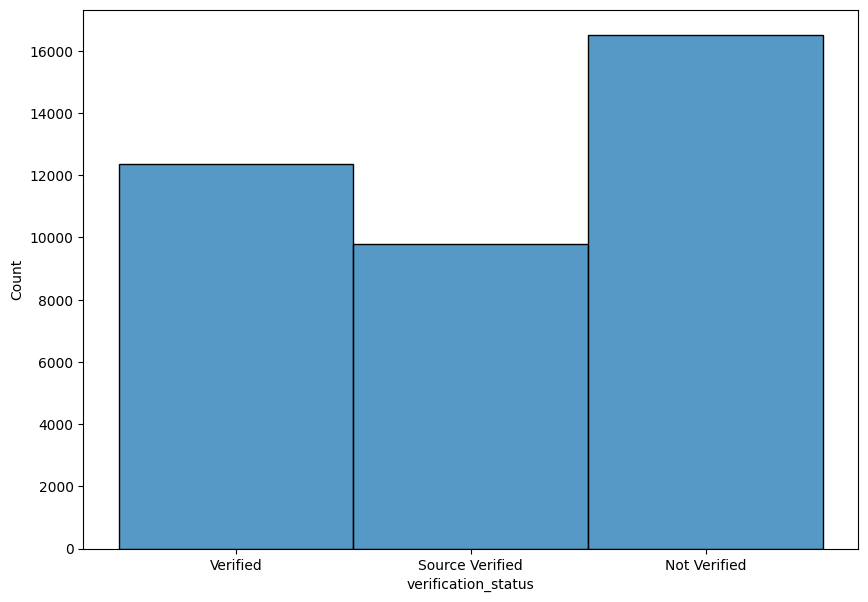

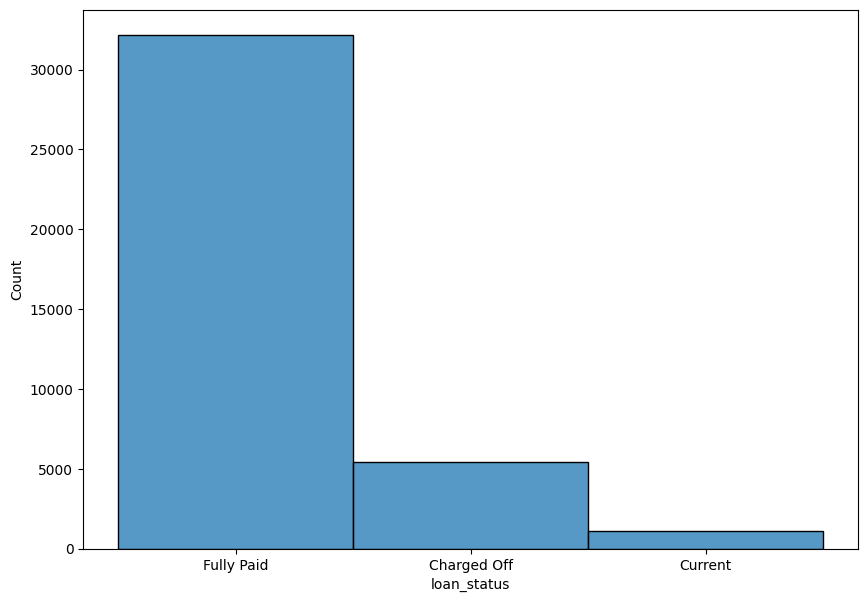

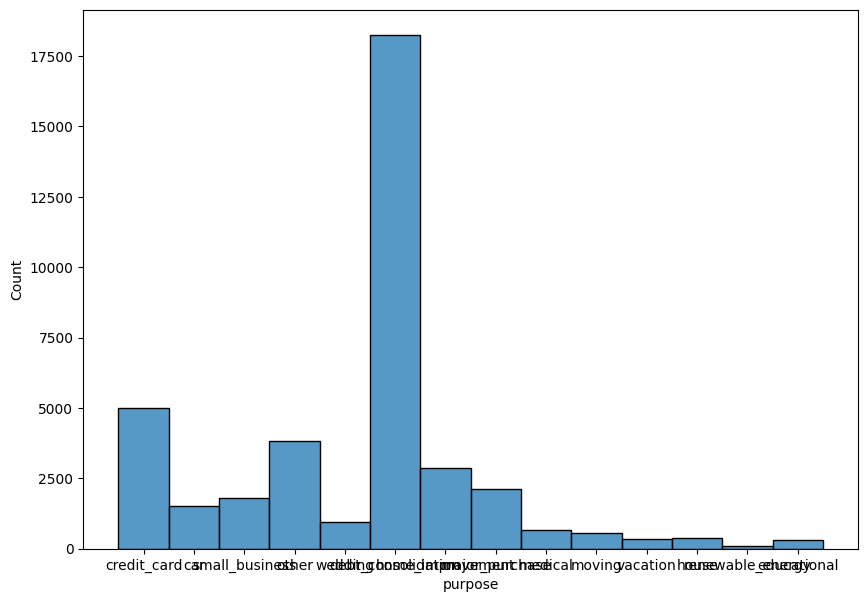

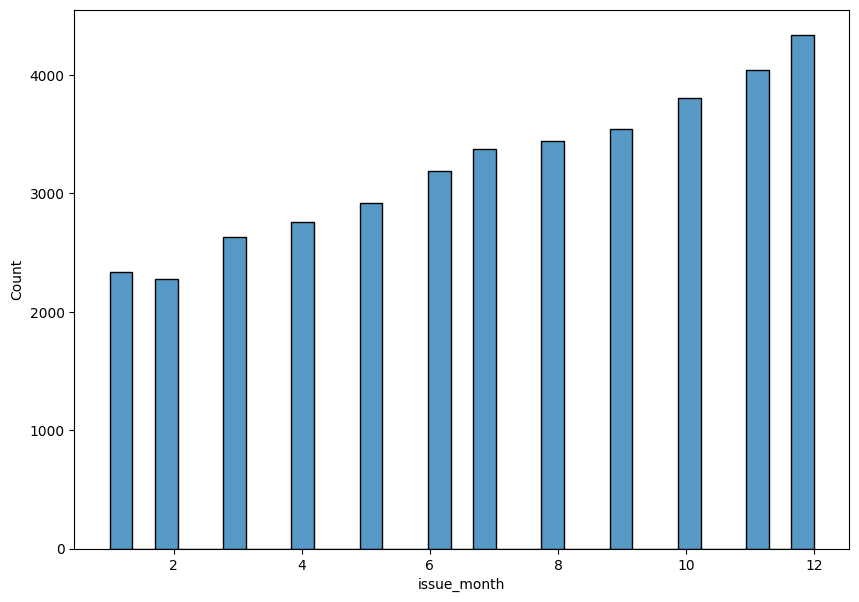

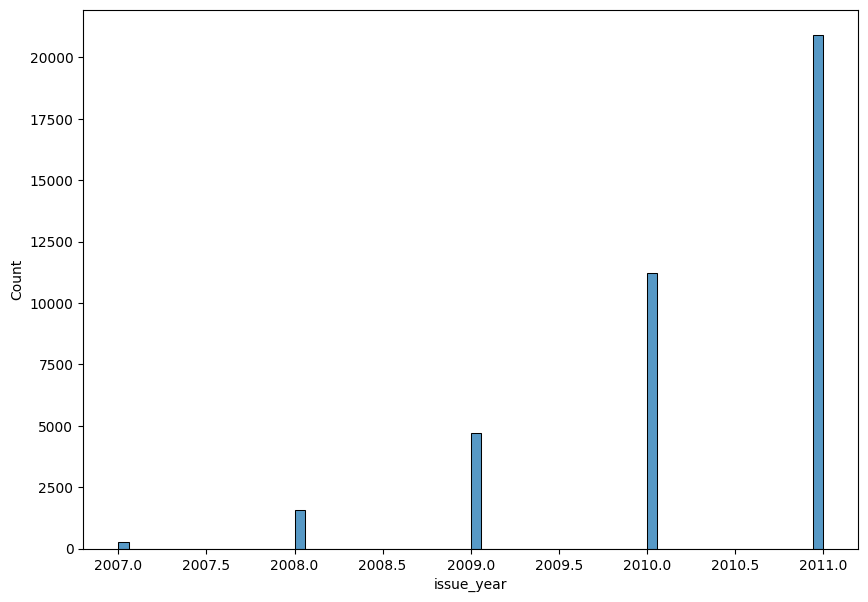

In [ ]:
for c in cat_cols:
    plt.figure(figsize=(10,7))
    sns.histplot(df[c])
    plt.show()

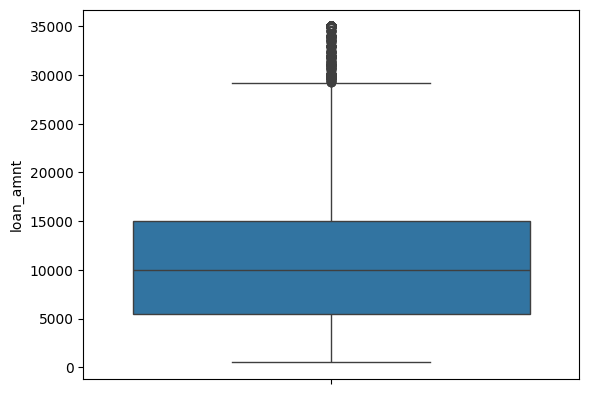

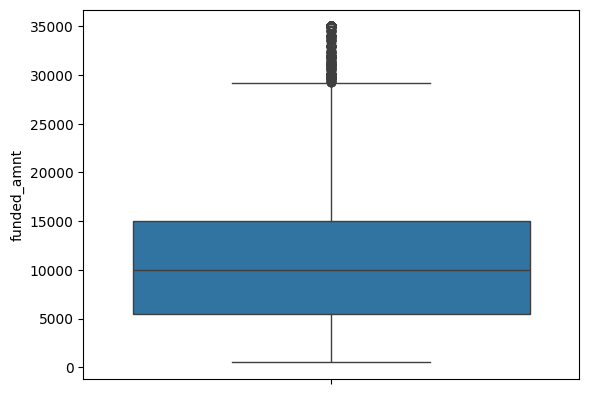

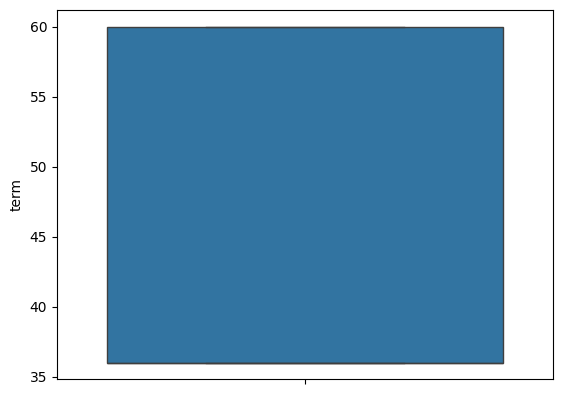

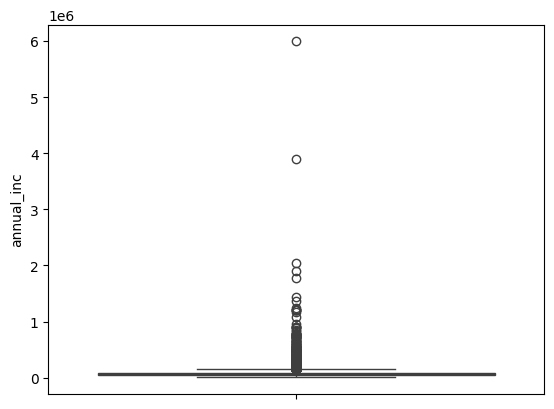

In [ ]:
for n in num_cols:
    sns.boxplot(data=df,y=n)
    plt.show()

In [ ]:
# We can clearly see there is outliers in annual_inc, we need fix this.
quantile_info = df.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quantile_info

0.50     60000.00
0.75     83199.99
0.90    117000.00
0.95    143975.00
0.97    168000.00
0.98    190000.00
0.99    235000.00
Name: annual_inc, dtype: float64

In [ ]:
q_95 = df['annual_inc'].quantile(0.95)
df = df[df.annual_inc <= q_95]

<Axes: >

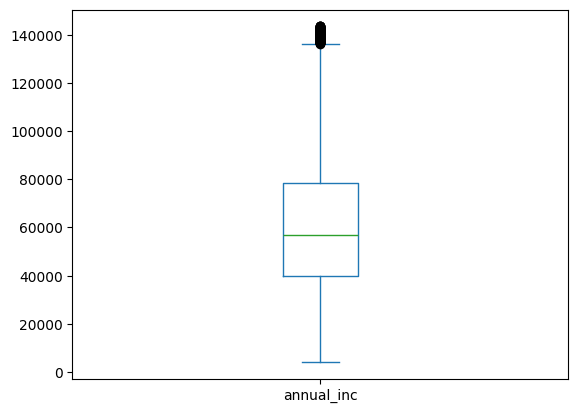

In [ ]:
df["annual_inc"].plot.box()